# Correlations with Contralateral Involvement

Roman Ludwig
[](https://orcid.org/0000-0001-9434-328X)  
Yoel Perez Haas  
Jan Unkelbach
[](https://orcid.org/0000-0002-4275-990X)

In [1]:
#| label: tbl-contra
#| tbl-cap: 'Contralateral involvement depending on whether the primary tumor extends over the mid-sagittal line, the T-category, and whether the ipsilateral LNL III was involved or healthy.'
#| html-table-processing: none
import pandas as pd
import paths
import shared
from shared import COL, LNLS

data = pd.read_csv(paths.data, header=[0,1,2])
data[COL.t_stage] = data[COL.t_stage].apply(lambda x: "early" if x <= 2 else "late")
early_midext_data = (data.loc[data[COL.t_stage] == "early", COL.midext] == True).mean()
late_midext_data = (data.loc[data[COL.t_stage] == "late", COL.midext] == True).mean()
grouped = data.groupby(by=[COL.midext, COL.t_stage, COL.ipsi_III])

total = grouped.count()[LNLS.contra]["max_llh", "contra"]
idx = total.index.rename(["Mid. ext.", "T-cat.", "ipsi III"])

num_involved = grouped.sum()[LNLS.contra]["max_llh", "contra"]
percent_involved = num_involved / total
total.index = idx
num_involved.index = idx
percent_involved.index = idx

involved = num_involved.join(
  100 * percent_involved,
  rsuffix=" (%)",
).sort_index(axis="columns")
involved.columns = pd.MultiIndex.from_product(
  [["I", "II", "III", "IV"],
   ["n", "%"]],
  names=["LNL", ""]
)
(
  involved.style
  .format(precision=2)
  .apply(shared.right_align, axis="index")
)

LNL 
 I 
 II 
 III 
 IV 
 
 
   
   
 
 n 
 % 
 n 
 % 
 n 
 % 
 n 
 % 
 
 
 Mid. ext. 
 T-cat. 
 ipsi III 
   
   
   
   
   
   
   
   
 
 
 
 
 False 
 early 
 False 
 1 
 0.36 
 13 
 4.74 
 2 
 0.73 
 1 
 0.37 
 
 
 True 
 1 
 0.95 
 14 
 13.33 
 3 
 2.86 
 3 
 2.86 
 
 
 late 
 False 
 2 
 1.68 
 8 
 6.72 
 1 
 0.84 
 1 
 0.84 
 
 
 True 
 2 
 3.51 
 13 
 22.81 
 6 
 10.53 
 3 
 5.26 
 
 
 True 
 early 
 False 
 1 
 5.56 
 3 
 16.67 
 1 
 5.56 
 0 
 0.00 
 
 
 True 
 0 
 0.00 
 3 
 27.27 
 4 
 36.36 
 1 
 9.09 
 
 
 late 
 False 
 2 
 2.27 
 26 
 29.55 
 6 
 6.82 
 2 
 2.27 
 
 
 True 
 2 
 2.63 
 41 
 53.95 
 17 
 22.37 
 7 
 9.21

# Involvement Patterns

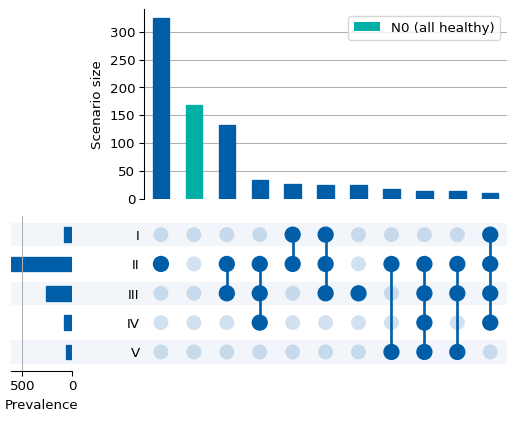

In [2]:
#| echo: false
#| label: fig-data-upset
#| fig-cap: 'Upset plot of the ipsilateral lymphatic involvement patterns [@lex_upset_2014]. Here, the horizontal bars depict the overall prevalence of LNL involvemen. I.e., LNL II is the only level that is involved in more than 500 patients. The vertical bar plots depict joint involvements. E.g., the fourth bar from the left depicts how often the LNLs II, III, and IV are jointly involved while level I and V are not. This is indicated by the light and dark shaded dots in the matrix underneath.'
#| warning: false
import upsetplot
import pandas as pd
from lyscripts.plot.utils import COLORS
import matplotlib.pyplot as plt
import paths

data = pd.read_csv(paths.data, header=[0,1,2])
lnls = ["I", "II", "III", "IV", "V"]

indicator_data = upsetplot.from_indicators(lnls, data=data["max_llh", "ipsi"])
upset = upsetplot.UpSet(
  indicator_data,
  sort_by="cardinality",
  sort_categories_by="-input",
  min_subset_size=10,
  facecolor=COLORS["blue"],
)
upset.style_subsets(absent=lnls, facecolor=COLORS["green"], label="N0 (all healthy)")
axes = upset.plot()
axes["totals"].set_xlabel("Prevalence")
axes["intersections"].set_ylabel("Scenario size")
plt.show()